In [3]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [4]:
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()

In [5]:
X_test.shape

(10000, 28, 28)

In [35]:
Y_test.shape
y = Y_test

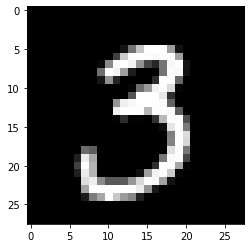

In [36]:
plt.imshow(X_test[90],cmap='gray')
plt.show()

In [37]:
Y_test[90]

3

# Preprocessing

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
sc = StandardScaler()

In [40]:
X = X_test.reshape(-1,28*28)
X_ = sc.fit_transform(X)

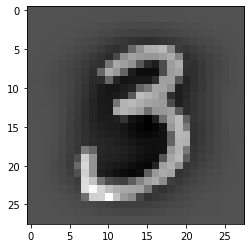

In [41]:
plt.imshow(X_[90].reshape(28,28),cmap='gray')

# PCA

In [42]:
from sklearn.decomposition import PCA

In [43]:
pca = PCA(n_components=2)

In [44]:
Z_pca = pca.fit_transform(X_)

In [45]:
Z_pca.shape

(10000, 2)

In [46]:
Z_pca

array([[-5.45825979,  6.4139457 ],
       [ 2.80440539, -8.02887976],
       [-7.41121925, -3.864082  ],
       ...,
       [-5.00437284,  1.15330062],
       [-1.42109626, -4.4230959 ],
       [13.14307981, -4.26201698]])

In [47]:
X_.shape

(10000, 784)

In [48]:
pca.explained_variance_

array([41.39893396, 28.35105802])

## Custom PCA

In [49]:
import numpy as np

In [50]:
covar = np.dot(X_.T,X_)

In [51]:
covar.shape

(784, 784)

In [52]:
from numpy.linalg import svd

In [53]:
U,S,V = svd(covar)

In [54]:
U.shape

(784, 784)

In [55]:
Ured = U[:,:2]

In [56]:
z = np.dot(X_,Ured)

In [57]:
z.shape

(10000, 2)

In [58]:
z

array([[  5.45831116,  -6.41400668],
       [ -2.80443233,   8.02885014],
       [  7.41124146,   3.86404387],
       ...,
       [  5.00435204,  -1.15364641],
       [  1.42085442,   4.42308066],
       [-13.14268302,   4.26280299]])

## Visualize Dataset

In [67]:
import pandas as pd
import seaborn as sns

In [62]:
new_dataset = np.hstack((z,Y_test.reshape(-1,1)))

In [64]:
dataframe = pd.DataFrame(new_dataset,columns=['PC1','PC2','Label'])

In [65]:
dataframe.head()

,PC1,PC2,Label
0,5.458311,-6.414007,7.0
1,-2.804432,8.028850,2.0
2,7.411241,3.864044,1.0
3,-8.751242,-0.045991,0.0
4,0.065756,-6.296290,4.0


<Figure size 1080x1080 with 0 Axes>

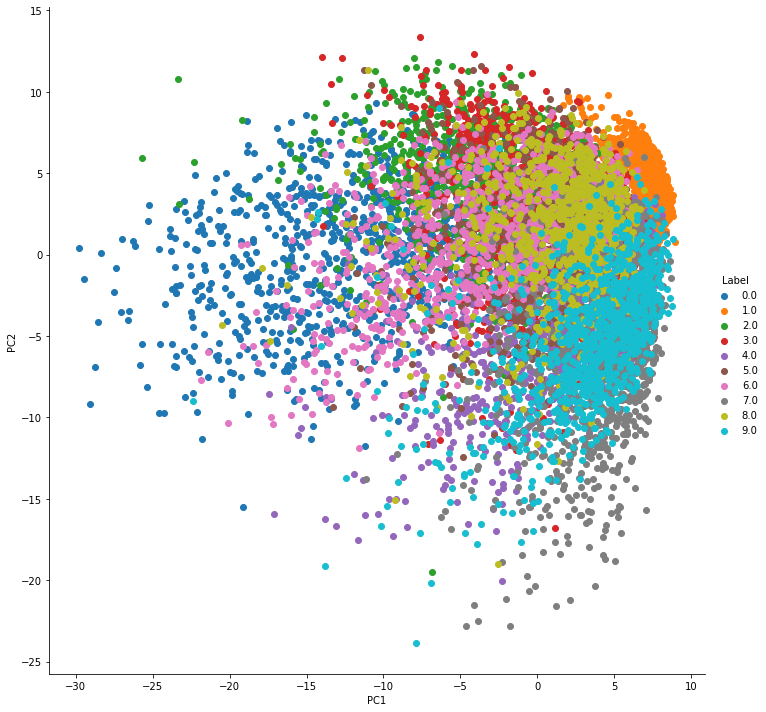

In [69]:
plt.figure(figsize=(15,15))
fg = sns.FacetGrid(dataframe,hue='Label',height=10)
fg.map(plt.scatter,"PC1","PC2")
fg.add_legend()
plt.show()